In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [2]:
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [3]:
address='E:\\afitech\\Afitech PPML Datasets\\mtcars.csv'
cars=pd.read_csv(address)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
cars_data=cars.iloc[:,1:]
cars_data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [16]:
Y=cars.iloc[:,9]
Y

0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: am, dtype: int64

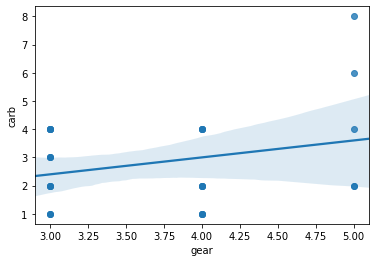

In [17]:
sb.regplot(x='gear',y='carb',data=cars,scatter=True)

In [18]:
gear = cars['gear']
carb = cars['carb']

spearmanr_coefficient, p_value = spearmanr(gear,carb)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))
print('P-Value is:',p_value)
#negetive means inversly proportional, 0 means indepentent variables to each other.

Spearman Rank Correlation Coefficient 0.115
P-Value is: 0.531235752098829


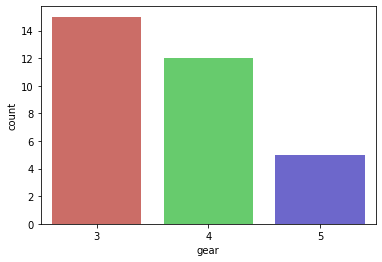

In [19]:
sb.countplot(x='gear',data=cars,palette='hls')

In [21]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [22]:
X=scale(cars_data)
X

array([[ 1.53299135e-01, -1.06667720e-01, -5.79750316e-01,
        -5.43654869e-01,  5.76594481e-01, -6.20166581e-01,
        -7.89600577e-01, -8.81917104e-01,  1.20894105e+00,
         4.30331483e-01,  7.46967077e-01],
       [ 1.53299135e-01, -1.06667720e-01, -5.79750316e-01,
        -5.43654869e-01,  5.76594481e-01, -3.55382189e-01,
        -4.71201785e-01, -8.81917104e-01,  1.20894105e+00,
         4.30331483e-01,  7.46967077e-01],
       [ 4.56736599e-01, -1.24445674e+00, -1.00602601e+00,
        -7.95569902e-01,  4.81584062e-01, -9.31677630e-01,
         4.32823359e-01,  1.13389342e+00,  1.20894105e+00,
         4.30331483e-01, -1.14010764e+00],
       [ 2.20729683e-01, -1.06667720e-01,  2.23615417e-01,
        -5.43654869e-01, -9.81576392e-01, -2.33633287e-03,
         9.04735855e-01,  1.13389342e+00, -8.27170192e-01,
        -9.46729262e-01, -1.14010764e+00],
       [-2.34426513e-01,  1.03112130e+00,  1.05977159e+00,
         4.19549669e-01, -8.48561806e-01,  2.31296954e-01,
  

In [23]:
LogReg=LogisticRegression()

In [24]:
LogReg.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(LogReg.score(X,Y))

1.0


In [26]:
y_pred=LogReg.predict(X)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [28]:
print(list(y_pred))
print(list(Y))

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
